# I. Linear least squares approximation

# Python Library

In [157]:
import numpy as np
import matplotlib.pyplot as plt

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [158]:
x = np.array([-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3])
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [159]:
# 1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.
def designMatrix(x_value, m_index):
    output = []
    for m_i in range(0, m_index+1):
        ans_i = x_value ** m_i
        output.append(ans_i)
    output = np.array(output)
    output = output.T
    return output

In [160]:
# 2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.
def systemEquations(A, y):
    trans1 = np.linalg.inv(A.T @ A)
    trans2 = trans1 @ A.T
    x = np.dot(trans2, y)
    matrix_product = A @ x
    answer = np.linalg.norm(matrix_product - y)
    return x, answer

In [161]:
# 3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.
n = min(12, x.shape[0], y.shape[0])
m_index = [i for i in range(0, n)]

answer = []

for m_i in m_index:
    A = designMatrix(np.array(x), m_i)
    x_i, answer_i = systemEquations(A, y)
    answer.append(np.array([x_i, answer_i]))
answer = np.array(answer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [162]:
# ... ENTER YOUR CODE HERE ...

sigma_2 = []

for i in range(answer.shape[0]):
    a2 = answer[i][1]
    coeficient = a2 / (n - i)
    sigma_2.append([i, coeficient])

for val in sigma_2:
    print("[m={}] σ^2={}".format(val[0], val[1]))

[m=0] σ^2=0.8836111722379384
[m=1] σ^2=0.7175660313664283
[m=2] σ^2=0.5647526092771004
[m=3] σ^2=0.042983026968416965
[m=4] σ^2=0.04627777602063196
[m=5] σ^2=0.05070937457172232
[m=6] σ^2=0.05383032068594496
[m=7] σ^2=0.06270959545444185
[m=8] σ^2=0.07114492281302116
[m=9] σ^2=0.09284770749972922
[m=10] σ^2=0.13350056026726065
[m=11] σ^2=0.14670468990380656


---

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

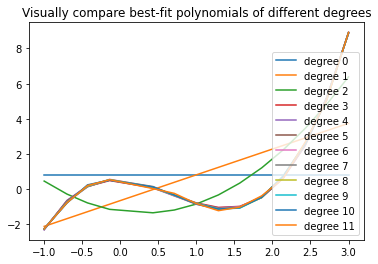

In [163]:
# ... ENTER YOUR CODE HERE
legend = []
for i in range(answer.shape[0]):
    a1 = answer[i][0]
    polynomial = np.polynomial.polynomial.polyval(x, a1)
    plt.plot(x, polynomial)
    legend.append("degree {}".format(i))

plt.title("Visually compare best-fit polynomials of different degrees")
plt.legend(legend)
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [164]:
# ... ENTER YOUR CODE HERE ...
x_new = np.array([
    -1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3
])
y_new = np.array([
    -2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90
])

def QR(A, b):
    m = A.shape[1]
    ans = tuple(np.linalg.qr(A))
    Q = ans[0]
    R = ans[1]
    f = (Q.T @ b)
    f = f[:m]
    answer = np.linalg.solve(R[:m], f)
    return answer

m_index = 3
c = QR(designMatrix(x_new, m_index), y_new)
answer = c-sigma_2[m_index][1]

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [165]:
# ... ENTER YOUR CODE HERE ...

def lagrangeInterpolation(points, x, y):
    answer = np.array([0 for _ in range(len(x))])
    n = len(points)
    for index in range(n):
        answer = answer + y[index] * lagrangePolynomial(points, index, x)
    return answer 

def lagrangePolynomial(points, position, x):
    answer = 1.0
    n = len(points)
    for index in range(n):
        if index != position:
            answer = answer * (x-points[index])
            answer = answer / (points[position]-points[index])
    return answer

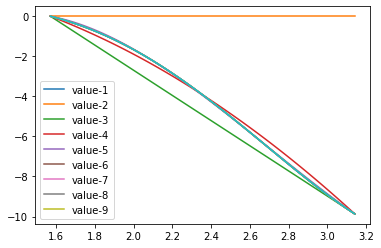

In [166]:
def f(x):
    return (x**2) * np.cos(x)

LIMIT = 10
SAMPLES = 100
LEFT = np.pi / 2
RIGHT =  np.pi

x = np.linspace(LEFT, RIGHT, SAMPLES)
plt.plot(x, f(x))


legend = []
for value in range(LIMIT):
    if value != 0:
        points = np.linspace(LEFT, RIGHT, value)
        plt.plot(x, lagrangeInterpolation(points, x, f(points)))
        legend.append("value-{}".format(value))

plt.legend(legend)

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

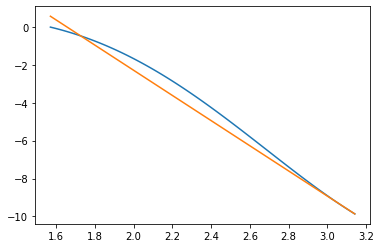

In [167]:
# ... ENTER YOUR CODE HERE ...
it = 2
k = np.array(range(it))
X = np.cos(2*k+1/it)
points = (X+1)*(RIGHT-LEFT)/2 + LEFT

plt.plot(x, f(x))
plt.plot(x, lagrangeInterpolation(points, x, f(points)))